In [2]:
import unicodedata, collections
import pandas as pd
import matplotlib.pyplot as plt
from stop_words import get_stop_words

from preprocessing import get_text, tokenize

path = 'D:\\Documentos\\GitHub\\freestyle_generator\\'
#dataset_path = path + 'datasets\\freestyle_lyrics\\lyrics\\'
dataset_path = path + 'datasets\\'

corpus = get_text(dataset_path)
corpus = unicodedata.normalize('NFC', corpus)

tokenized_text = tokenize('W', corpus, None)

symbols = ['\n','?','¿',',','.','"',':',"'",'(',')']
stop_words = get_stop_words('es') + symbols + ['vos']

counter = collections.Counter(tokenized_text)

token_freq = collections.Counter({key: value for key, value in counter.items() if (key not in stop_words)})

token_freq = pd.DataFrame(token_freq.most_common(30), columns=['words', 'count'])

token_freq.head()

#with open(path + 'corpus.txt', 'w', encoding='utf-8') as corpus_file:
#    corpus_file.write(corpus)


,words,count
0,si,3577
1,pa',1593
2,yeah,1421
3,quiero,1375
4,voy,1314


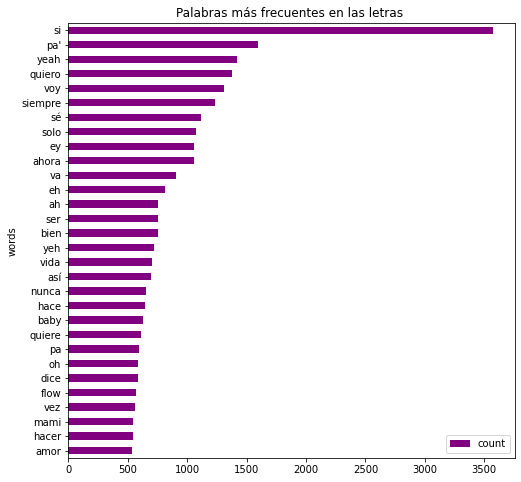

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
token_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Palabras más frecuentes en las letras ")

plt.show()